# Get producer info

In this notebook we'll explore the producers of videos in the different infospheres. We will look at activity, size, topics development, and monetizing strategies and potential.

- [Channel stats and comparisson](http://localhost:8888/notebooks/Producers_nl.ipynb#Channels-Netherlands-Right)
- [PVV, Fvd and other parties](#Comparisson-of-PVV-and-FvD-with-other-political-parties)
- [Show channel development over time](http://localhost:8888/notebooks/Producers_nl.ipynb#Show-channel-development-over-time)
- [Channel peformance and monetizing potential](http://localhost:8888/notebooks/Producers_nl.ipynb#Get-some-statistics-on-the-relative-size-and-performance-of-the-channels)
- [What are the videos about?](http://localhost:8888/notebooks/Producers_nl.ipynb#So-what-are-these-videos-about?)
- [Recommendations](http://localhost:8888/notebooks/Producers_nl.ipynb#And-then,-the-recommendations)
- [Filter recommendations by channel](http://localhost:8888/notebooks/Producers_nl.ipynb#Filter-recommendations-by-channel)
- [Filter recommendations by topic](http://localhost:8888/notebooks/Producers_nl.ipynb#See-recommendations-by-topic)

In [2]:
import pandas as pd #basically the engine for the whole analysis. 
import matplotlib.pyplot as plt #for plotting our data.
import glob #a nice library for iterating through multiple files.
import networkx as nx #we need this to construct and export network graphs.
import seaborn as sns; sns.set() #for plotting
import csv #for reading and writing csv's when we are not using the pandas library.
import re
import sys

csv.field_size_limit(sys.maxsize)

%matplotlib inline

In [3]:
# Set path to NL data - better to set these constants in a separate config file and import them here.

path_nl = '/Users/omeuwese/Documents/Olaf/programming/python/correspondent/data/NL/'

# Set path to control group data.

path_right = '/Users/omeuwese/Documents/Olaf/programming/python/correspondent/data/right/'

# Set path to international right data

path_left = '/Users/omeuwese/Documents/Olaf/programming/python/correspondent/data/left/'

# Dutch infosphere

We need:
1. Statistics on channels, videos and recommendations on the Dutch infosphere channels.
2. Comparisson of political channels, also with non-right political parties.
3. Topics of videos (by tags or through topic modelling).


Let's start by looking at the channels.

## Channels Netherlands Right

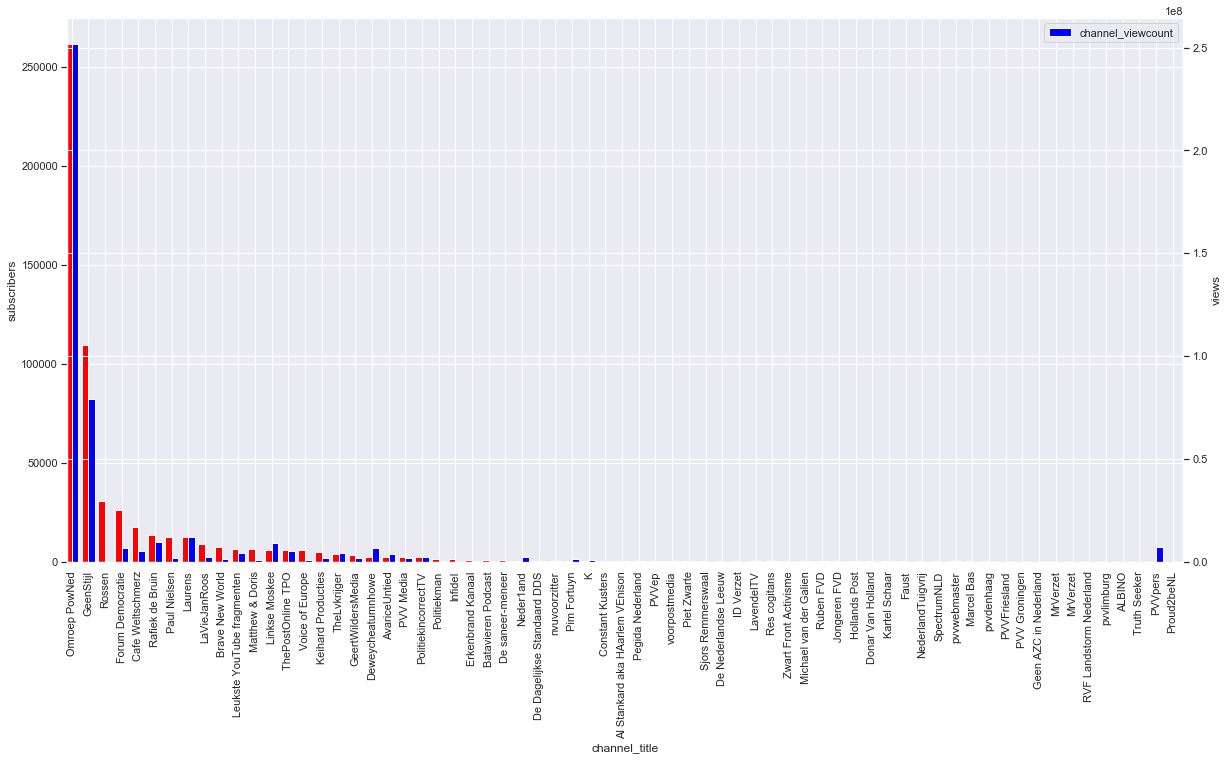

In [5]:
# Import the channel data into a dataframe.

channels = pd.read_csv(path_nl + 'channels_nl_right.csv')

# Take a subset of the channel data.

stats = channels[['channel_title', 
                  'channel_description', 
                  'channel_subscribercount',
                  'channel_viewcount', 
                  'channel_videocount']]

stats = stats.sort_values(by='channel_subscribercount', ascending=False)
stats.set_index("channel_title",drop=True,inplace=True)

# Create matplotlib figure.

fig = plt.figure(figsize=(20,10)) 

# Create matplotlib axes.

ax = fig.add_subplot(111) 

# Create another axes that shares the same x-axis as ax.

ax2 = ax.twinx() 

# Set a width for a bar chart.

width = 0.4

# Configure the bar chart.

stats.channel_subscribercount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
stats.channel_viewcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=True, grid=True)
ax.set_ylabel('subscribers')
ax2.set_ylabel('views')

plt.show()

Too many channels and I'm not sure it's too wise to include some channels, like Omroep Powned, GeenStijl, Cafe Weltschmerz, Matthew & Doris, ThePostOnline TPO, Voice of EuropeAl Stankard. Let's filter these out.

In [6]:
filter_out = ['Omroep PowNed',
            'GeenStijl', 
            'ThePostOnline TPO', 
            'Cafe Weltschmerz',
            'Al Stankard aka HAarlem VEnison',
            'Voice of Europe',
            'Matthew & Doris'
             ]

In [7]:
filtered_channels_nl = channels[~channels['channel_title'].isin(filter_out)]

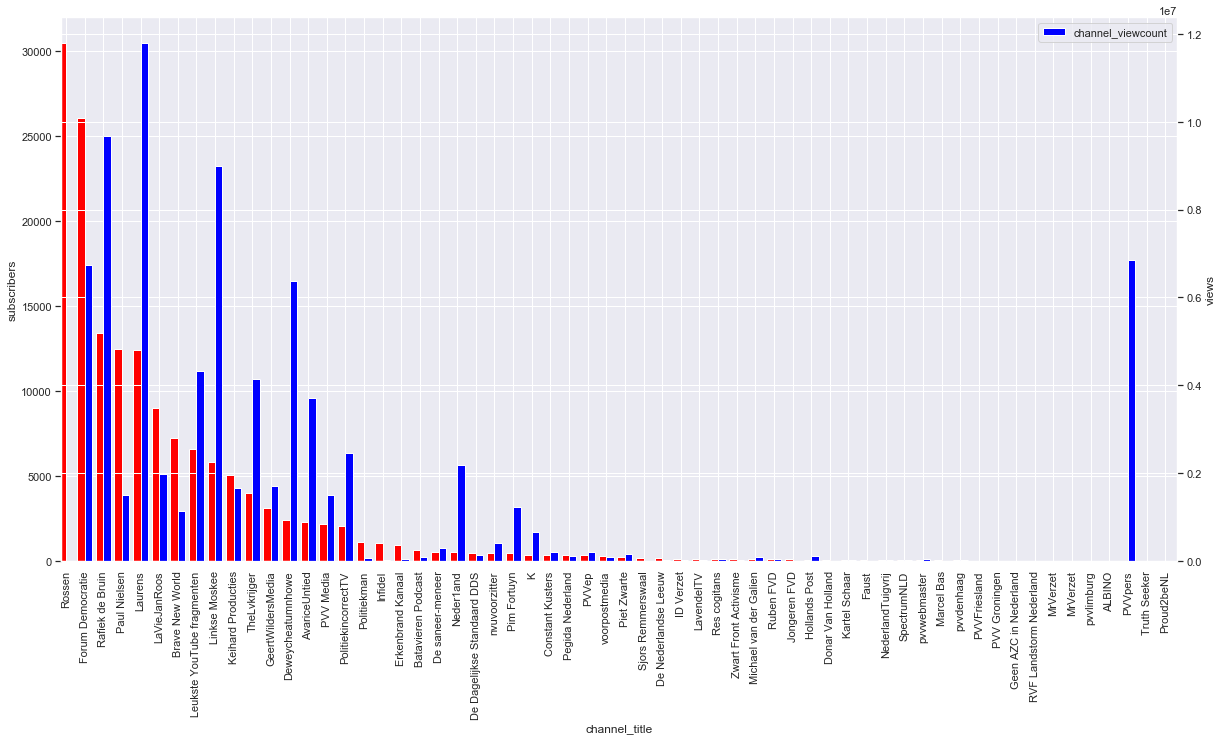

In [8]:
stats = filtered_channels_nl[['channel_title', 
                  'channel_description', 
                  'channel_subscribercount',
                  'channel_viewcount', 
                  'channel_videocount']]

stats = stats.sort_values(by='channel_subscribercount', ascending=False)
stats.set_index("channel_title",drop=True,inplace=True)

# Create matplotlib figure.

fig = plt.figure(figsize=(20,10)) 

# Create matplotlib axes.

ax = fig.add_subplot(111) 

# Create another axes that shares the same x-axis as ax.

ax2 = ax.twinx() 

# Set a width for a bar chart.

width = 0.4

# Configure the bar chart.

stats.channel_subscribercount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
stats.channel_viewcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=True, grid=True)
ax.set_ylabel('subscribers')
ax2.set_ylabel('views')

plt.show()

Be careful, because there are two y-axis. The left is subscribers, the right is viewcount. 

That said though, there are some takeaways and questions:
1. PVVpers has 0 subscribers. That means that the subscribercount has not been given on the channel page. They have a lot of viewers. Still more than Forum voor Democratie, but FvD is catching up. PVV is much older.
2. Some channels generate a lot of views, like Laurens, Rafiek de Bruin, Leukste YouTube Fragmenten, Deweycheatumhowe and the LvKrijger. Most of them are very pro FvD and pro PVV.
3. FvD has relatively many subscribers (they rank 2nd), but not that many views (relitavely, they rank 4th). Did they buy subscribers? 
4. Why did Rossen remove all his videos? He was quite popular.
5. If we look at FvD more broadly and take affiliated channels into consideration, FvD is very big.

Get more statistics, now on videos.

In [10]:
# Load videos

videos = pd.read_csv(path_nl + 'videos_nl_right.csv')

In [11]:
# Add column with upload year

videos['video_upload_year'] = pd.DatetimeIndex(videos['video_published']).year

In [12]:
# Filter out the channels we dropped before

videos = videos[~videos['video_channel_title'].isin(filter_out)]

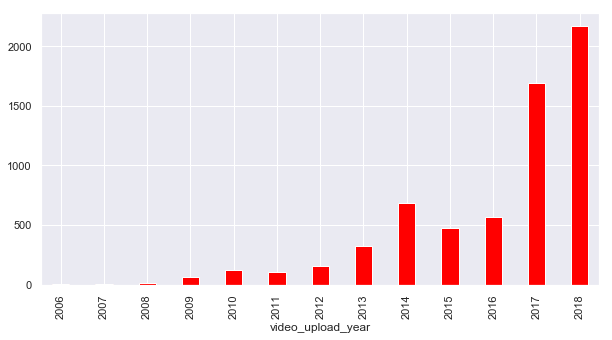

In [13]:
# Plot views and uploads per year.

uploads_per_year = videos.groupby(['video_upload_year']).size()
views_per_year = videos.groupby(['video_upload_year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

uploads_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()



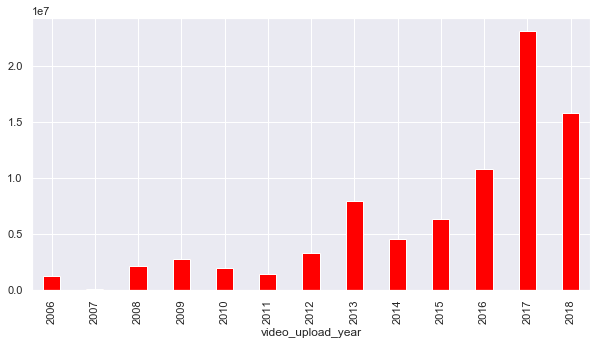

In [14]:
# Then the views per year.

fig = plt.figure(figsize=(10,5))
width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

In 2018 more videos were uploaded, but they've gotten significantly lesser views. It could be that older video's are still getting views. 

Let's cluster all the PVV channels and FvD channels and let's compare them.
Please check if you think the channels really belong (officially or unofficially to these parties). The LvKrijger for instance clearly has a PVV bias, but I'm not sure it's actually part of the PVV media strategy. 

In [15]:
fvd = ['Forum Democratie', 
        'Paul Nielsen', 
        'Leukste YouTube fragmenten', 
        'Res cogitans',
        'Kartel Schaar',
        'Jongeren FVD',
        'Ruben FVD',
        'LavendelTV'
               ]

pvv = ['PVVpers',
       'PVVFriesland', 
       'PVVep',
       'pvvlimburg', 
       'PVV Groningen', 
       'pvvwebmaster', 
       'pvvdenhaag',
       'PVV Media', 
       'GeertWildersMedia',
       'TheLvkrijger',
      ]

In [16]:
filtered = videos.loc[(videos['video_channel_title'].isin(fvd)) | \
                      (videos['video_channel_title'].isin(pvv))
                     ]

In [19]:
filtered.video_channel_title.replace(fvd, 'fvd', inplace=True)
filtered.video_channel_title.replace(pvv, 'pvv', inplace=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


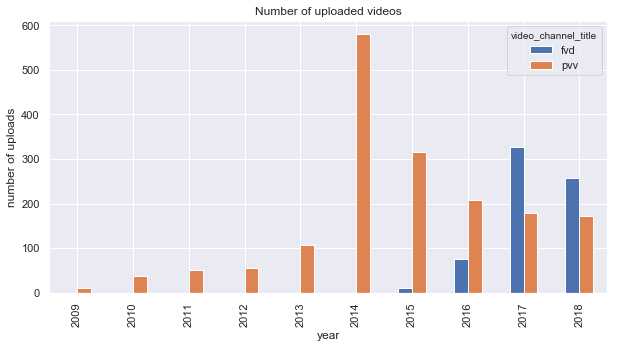

In [20]:
# First look at the number of published videos per year.

ax = filtered.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.bar(title="Number of uploaded videos", figsize=(10,5), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

Newcomer FvD is very active in uploading videos. PVV is losing some of its steam, especially after peak year 2014.

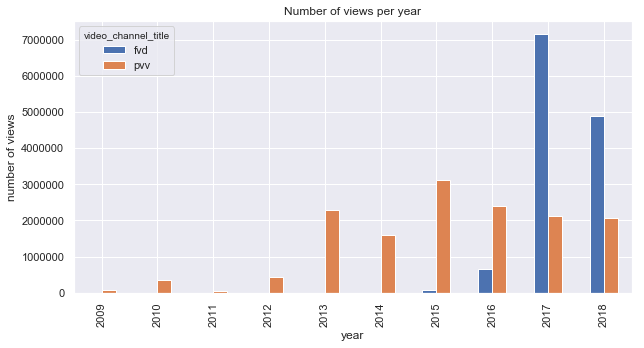

In [21]:
# Now look at the viewcount per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .sum().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

The same development (PVV is getting less exposure on YouTube, FvD is very active) is represented in the view counts.

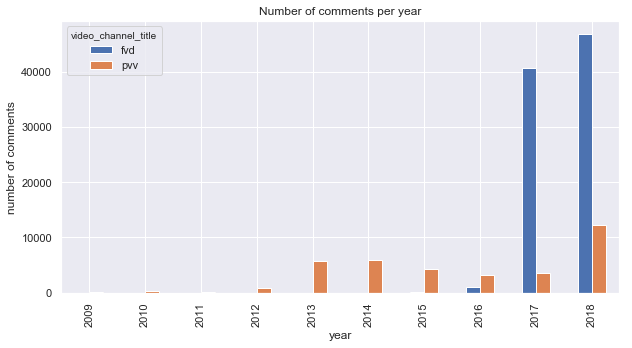

In [22]:
# Now look at the comment count per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_comment_count'] \
        .sum().unstack(1).plot.bar(title="Number of comments per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of comments')

plt.show()

If we look at the comments, it's clear where the buzz was these past few years.

## Comparisson of PVV and FvD with other political parties

Let's import data from other policital parties and compare their activity with PVV and FvD. My suggestion would be to only use the official (national) party channels, because we don't know the unofficial party channels for the other political parties.

In [25]:
other_parties = pd.read_csv(path_nl+'controlegroep/videos_nl_controlegroep_politiek.csv')
len(other_parties)

4309

In [26]:
other_parties.shape

(4309, 16)

In [27]:
other_parties.video_channel_title.unique()

array(['CDA', 'Socialistische Partij (SP)', 'Partij voor de Dieren',
       'Partij van de Arbeid (PvdA)', 'Democraten66', 'GroenLinks',
       'ChristenUnie', 'DENK TV', 'VVD', 'SGP', '50PLUS Partij'],
      dtype=object)

In [28]:
fvd = ['Forum Democratie']

pvv_official = ['PVVpers',
               'pvvwebmaster', 
               'PVV Media', 
               'GeertWildersMedia']



In [29]:
fvd_pvv = videos.loc[(videos['video_channel_title'].isin(fvd)) | \
                      (videos['video_channel_title'].isin(pvv))
                     ]

fvd_pvv['video_channel_title'] = fvd_pvv.video_channel_title.replace(pvv, 'pvv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
parties = other_parties.append(fvd_pvv, sort=False)
len(parties)

6396

In [31]:
parties['video_upload_year'] = pd.DatetimeIndex(parties['video_published']).year

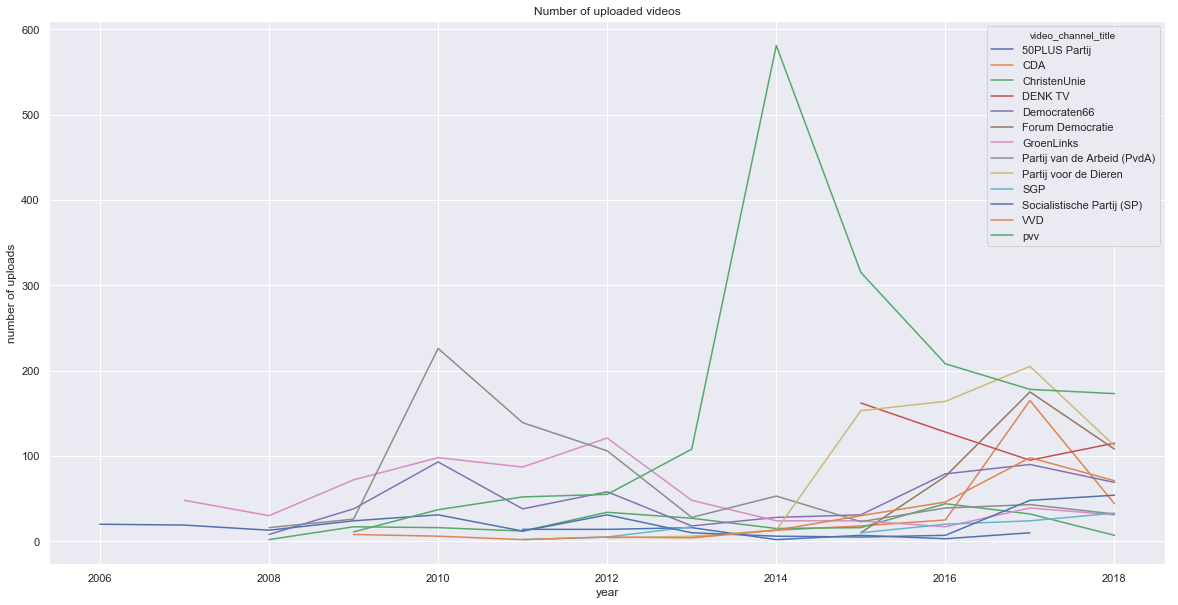

In [32]:
# Again look at the number of published videos per year.

ax = parties.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.line(title="Number of uploaded videos", figsize=(20,10), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

It's not a ver clear line graph, but we see the huge activity of PVV (and their drop), but also a lot of activity for Partij voor de Dieren. 

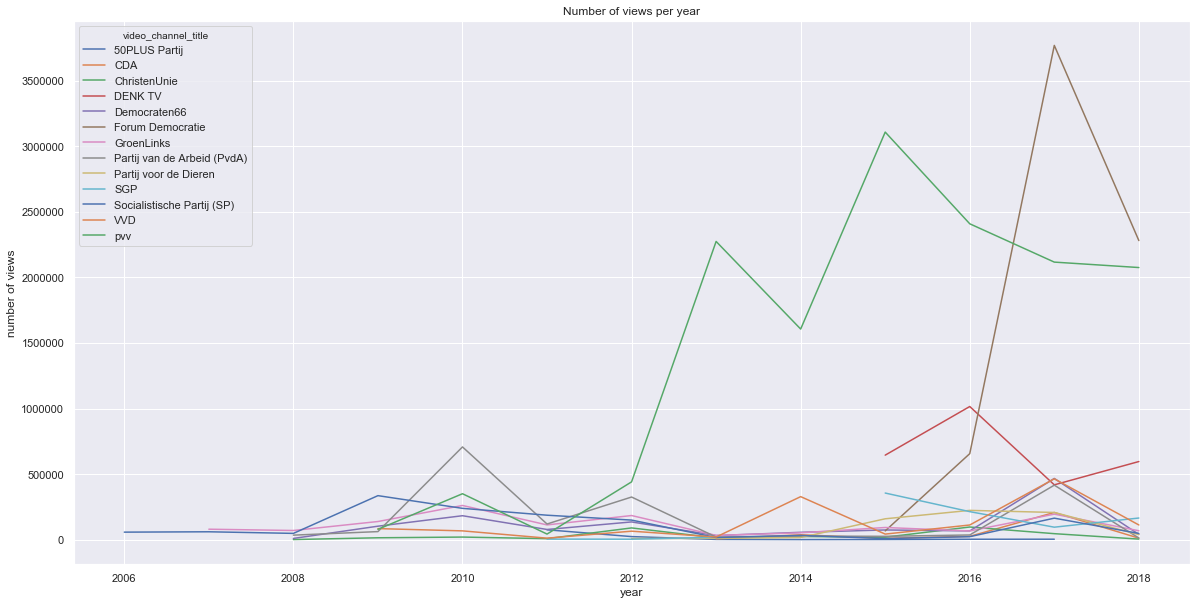

In [33]:
# Now look at the viewcount per year.

ax = parties.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .sum().unstack(1).plot.line(title="Number of views per year", figsize=(20,10), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

Look at Forum!

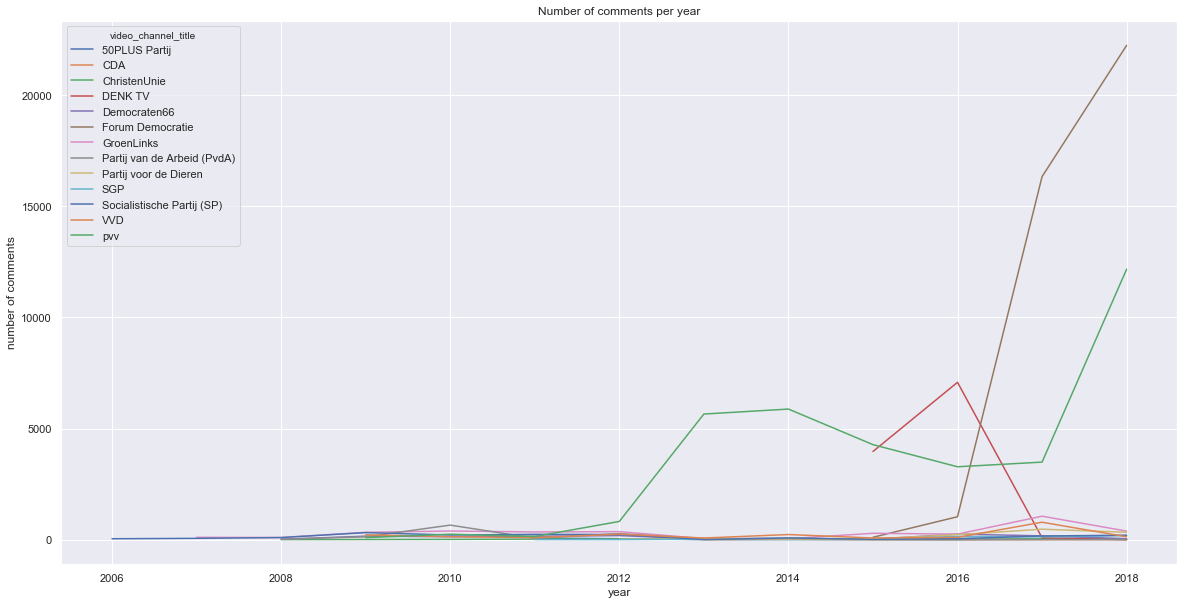

In [34]:
# Now look at the comment count per year.

ax = parties.groupby(['video_upload_year', 'video_channel_title'])['video_comment_count'] \
        .sum().unstack(1).plot.line(title="Number of comments per year", figsize=(20,10), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of comments')

plt.show()

And here's the buzz... Most commented channels, with Forum and PVV clear winners. The rest doesn't even come close.

## Show channel development over time

Socialblade.com provides a range of statistics on YouTube channels, like daily views and subscription info. I've run the list of channels through [socialblade.com](https://www.socialblade.com). I want to try to get a sense of the the growth of the infospheres in recent years, maybe in a bubble flow chart. It would make a great comparisson with other information networks on YouTube. We can use four axes for that:
- x = monthly_views
- y = monthly_subscriptions
- z = monthly_comments (z is size of the bubble)
- plus time

The only constraint is that the oldest data is from early 2015, so it's not that old.

I'll prepare the data for use in [gapminder](https://www.gapminder.org/tools/), an easy way to explore this kind of data.

In [35]:
# Import the data from socialblade

channel_history = pd.read_csv(path_nl + 'other_platforms/socialblade_nl_monthly.csv')


In [36]:
# Extract all the dates and values of two columns: daily views and total subs

pattern = re.compile('(\d{4}-\d{2}-\d+,\d+)')

# And create two new columns with lists of dates and values found

channel_history['daily_views'] = channel_history['Date_Daily_Views'].str.findall(pattern)
channel_history['daily_subs'] = channel_history['Date_Total_Subs'].str.findall(pattern)

# Stack them, so all the dates and values are linked to the channels and
# we are getting rid of the messy lists.

daily_views = channel_history.set_index('User') \
            .daily_views.apply(pd.Series) \
            .stack() \
            .reset_index(level=-1, drop=True) \
            .reset_index()

# Extract the values columns for views and subscriptions (subs)

daily_views['date'], daily_views['views'] = daily_views[0].str.split(',', 1).str
daily_views = daily_views[['User', 'date', 'views']]
daily_views = daily_views.rename(columns = {'User': 'channel_id'})

daily_subs = channel_history.set_index('User') \
            .daily_subs.apply(pd.Series) \
            .stack() \
            .reset_index(level=-1, drop=True) \
            .reset_index()

daily_subs['date'], daily_subs['subs'] = daily_subs[0].str.split(',', 1).str
daily_subs = daily_subs[['User', 'date', 'subs']]
daily_subs = daily_subs.rename(columns = {'User': 'channel_id'})

# And bring it all together in a dataframe called daily_stats

daily_stats = pd.merge(daily_subs, daily_views,  how='left', left_on=['channel_id', 'date'], right_on = ['channel_id', 'date'])


In [38]:
channels

,channel_id,channel_title,channel_description,channel_default_language,channel_country,channel_uploads,channel_viewcount,channel_commentcount,channel_subscribercount,channel_videocount,channel_topic_ids,channel_topic_categories,channel_branding_keywords
0,UCmboH8kxYUEQ9p4t7IrgL-Q,Erkenbrand Kanaal,The channel of the Dutch Nationalists of Erken...,not set,NL,UUmboH8kxYUEQ9p4t7IrgL-Q,36354,0,915,52,"['/m/04rlf', '/m/0ggq0m', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...","Nederland nationalism Dutch nationalisme ""alt ..."
1,UCk487oVB6dZgjawOmf26trA,Proud2beNL,NaN,not set,not set,UUk487oVB6dZgjawOmf26trA,342,0,0,1,"['/m/04rlf', '/m/06by7', '/m/04rlf', '/m/06by7']","['https://en.wikipedia.org/wiki/Music', 'https...",not set
2,UCaEYLMXh96lyMfVwGhVzDZA,Neder1and,"If you send me a message, you should know that...",not set,not set,UUaEYLMXh96lyMfVwGhVzDZA,2183466,0,502,4,"['/m/04rlf', '/m/04rlf', '/m/064t9']","['https://en.wikipedia.org/wiki/Music', 'https...",not set
3,UCTf5A3Fy3_CU5k4Lf9lPvAQ,RVF Landstorm Nederland,NaN,not set,not set,UUTf5A3Fy3_CU5k4Lf9lPvAQ,2630,0,17,9,"['/m/04rlf', '/m/04rlf', '/m/098wr', '/m/06bvp']","['https://en.wikipedia.org/wiki/Society', 'htt...",not set
4,UCVVplPd75SucSkTvuW4bW-w,Pegida Nederland,NaN,not set,not set,UUVVplPd75SucSkTvuW4bW-w,119816,0,347,46,"['/m/098wr', '/m/098wr', '/m/019_rr']",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,not set
5,UC9H9K7oSpte0uWBofdW4UiA,Forum Democratie,Forum voor Democratie wil de Nederlandse polit...,not set,NL,UU9H9K7oSpte0uWBofdW4UiA,6729139,0,26030,369,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Politics', 'ht...",democratie
6,UCCEuhjaT09ArS77AJm6etXw,PVVpers,www.pvv.nl,not set,NL,UUCEuhjaT09ArS77AJm6etXw,6859197,0,0,212,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Society', 'htt...","PVV ""Geert Wilders"""
7,UCPg6u52TP02Mmovr2fXm8Pw,LaVieJanRoos,"Welkom op mijn Youtube-kanaal. Rauw, echt en p...",not set,NL,UUPg6u52TP02Mmovr2fXm8Pw,1986378,0,8984,152,"['/m/098wr', '/m/019_rr', '/m/04rlf']",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Jan Roos LavieJanRoos Powned Pownews Geenstijl...
8,UCUmao30M5OVBzSvUoiyiBFA,Rossen,Treitervlogger,not set,NL,UUUmao30M5OVBzSvUoiyiBFA,0,0,30453,0,"['/m/04rlf', '/m/04rlf', '/m/019_rr', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,rossen rosssen jeffrey vlog twitter
9,UC6AxurptaX9X8b1TKyJto8w,PVVFriesland,Kanaal van de PVV Fryslan,not set,not set,UU6AxurptaX9X8b1TKyJto8w,3468,0,24,7,"['/m/05qt0', '/m/05qt0', '/m/098wr']","['https://en.wikipedia.org/wiki/Politics', 'ht...",PVV Partij voor de Vrijheid Fryslân Fryslan Fr...


In [39]:
# Now we need to add some data, first the channel data (like channel_title, etc.)

# Import the channel data if you haven't imported the channels yet.

# channels = pd.read_csv(path_nl + 'channels_nl_right.csv')

# And merge them with daily_stats

channel_daily_stats = pd.merge(daily_stats, channels, on='channel_id', how='left')

# Drop empty values

channel_daily_stats = channel_daily_stats.dropna()

In [40]:
# We need to get the average (mean) views and subs per year, month and year_month

# The date is not recognized as a date

channel_daily_stats['date'] = pd.to_datetime(channel_daily_stats['date'])

# Get year_month (yyyy-mm format)

channel_daily_stats['yearmonth'] = channel_daily_stats['date'].dt.to_period('M')

# The values of subs and views are floats in stead of integers, which will get us into trouble later on

channel_daily_stats['subs'] = channel_daily_stats['subs'].astype('int')
channel_daily_stats['views'] = channel_daily_stats['views'].astype('int')


In [41]:
# Filter some channels out

nl_channel_daily_stats = channel_daily_stats[~channel_daily_stats['channel_title'].isin(filter_out)]

In [43]:
# Then it's time to get the comments and average out the comments per month

# Import the comments using an iterator (the comments file is quite large)

cols_to_keep = ['video_id', 'comment_time']

iter_csv = pd.read_csv(path_nl + 'comments_nl_right.csv', 
                        usecols=cols_to_keep,
                        iterator=True, 
                        chunksize=100000,
                        sep='¶',
                        quotechar='þ',
                        engine='python'
                        )
comments_we_need = pd.concat([chunk for chunk in iter_csv])


In [44]:
comments_we_need.shape

(790416, 2)

In [48]:
# Add channel data to comments_we_need


comments_channels_to_clean = pd.merge(comments_we_need, videos[['video_id', 'video_channel_title']], on='video_id').dropna()

# Parse some dates.

comments_channels_to_clean['comment_time'] = pd.to_datetime(comments_channels_to_clean['comment_time'], errors='coerce')
comments_channels_to_clean['yearmonth'] = comments_channels_to_clean['comment_time'].dt.to_period('M')

# And clean it up a bit.

comments_channels_to_clean = comments_channels_to_clean.rename(columns = {'video_channel_title': 'channel_title'})



In [49]:
# Prepare the data for merging - the code is still quite messy

comments_channels_to_clean = comments_channels_to_clean[['channel_title', 'yearmonth']]

merged_comments = pd.merge(nl_channel_daily_stats, 
                            comments_channels_to_clean, 
                            on=['channel_title', 'yearmonth'], 
                            how='left')



In [50]:
merged_comments = merged_comments.groupby([merged_comments.channel_title, 
                                           merged_comments.yearmonth ]) \
                                           .agg({'channel_id': 'count', 'subs':'mean', 'views':'mean'})

In [ ]:
merged_comments = merged_comments.rename(columns={'channel_id': 'comments'})

In [53]:
merged_comments.to_csv(path_nl + '/temp_data/nl_right_monthly_development_for_gapminder.csv')

You can find the Gapminder file [here](https://drive.google.com/open?id=1t9_lS314Li2M_Kwe5eI0Oozh64RtAxzD). You can see clearly the rise of FvD. But one interesting channel is Leukste YouTube Fragmenten. It shows a lot of steep peeks, which says something about the virality of its content.

## Get some statistics on the relative size and performance of the channels

Socialblade tracks many, many channels and also ranks channels according to some benchmarks. Let's have a look at these rankings. This time we'd better include channels like GeenStijl to get a sense of the importance, or lack thererof of these channels. The data is downloaded in November 2018 and represents a snapshot of that moment. For more information on the metrics, see the [FAQ of Socialblade.](https://socialblade.com/youtube/help)

For your idea:

Volkskrant ranks:
- Grade: C+
- Subscriber rank: 1,001,161st
- Video view rank: 502,428th
- Socialblade rank: 523,376th
- Estimated Monthly Earnings: €29 - €459
- Estimated Yearly Earnings: €344 - €5.5K

De Correspondent ranks:
- Grade: C
- Subscriber rank: 1,832,426th
- Video view rank: 5,212,726th
- Socialblade rank: 4,469,657th
- Estimated Monthly Earnings: €0.47 - €8
- Estimated Yearly Earnings: €6 - €90

In [54]:
channel_ranking = pd.read_csv(path_nl + 'other_platforms/socialblade_nl_right_summary.csv')

Clean the data up a bit, so we can actually do some calculations and visualisations

In [55]:
channel_ranking['Source Url'] = channel_ranking['Source Url'].str.replace('https://socialblade.com/youtube/channel/', '')
channel_ranking['Subscriber_Rank'] = channel_ranking['Subscriber_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)
channel_ranking['Video_View_Rank'] = channel_ranking['Video_View_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)
channel_ranking['Sb_Rank'] = channel_ranking['Sb_Rank'].replace('\D', '', regex=True).apply(pd.to_numeric)

In [56]:
channel_ranking['earnings_low'], channel_ranking['earnings_high'] = channel_ranking['Estimated_Yearly_Earning'].str.split('-', 1).str
channel_ranking['earnings_low'] = channel_ranking['earnings_low'].replace('\D', '', regex=True).apply(pd.to_numeric)
channel_ranking['earnings_high'] = channel_ranking['earnings_high'].replace('\D', '', regex=True).apply(pd.to_numeric)

In [57]:
channel_ranking = channel_ranking.rename(columns={'Source Url': 'channel_id',
                                                'Subscriber_Rank': 'subscriber_rank',
                                                'Video_View_Rank': 'video_view_rank',
                                                'Sb_Rank': 'sb_rank',
                                                  'Grade': 'grade'
                                               })

In [58]:
# Merge with channels

ranking = pd.merge(channel_ranking, channels, on='channel_id', how='left')

In [59]:
ranking_final = ranking[['channel_title', 
                   'subscriber_rank', 
                   'video_view_rank', 
                   'sb_rank', 
                   'grade', 
                   'earnings_low',
                   'earnings_high'
                  
                  ]]

In [60]:
ranking_final.sort_values('sb_rank')

,channel_title,subscriber_rank,video_view_rank,sb_rank,grade,earnings_low,earnings_high
46,Omroep PowNed,42077.0,10014.0,28146.0,B,28,4483
31,Rafiek de Bruin,511749.0,269276.0,62632.0,B,36,573
47,GeenStijl,93996.0,34208.0,103610.0,B-,2,316
3,Forum Democratie,304268.0,374057.0,210713.0,C+,12,187
4,PVVpers,24289015.0,366688.0,222089.0,C+,265,42
24,Laurens,538929.0,222258.0,257996.0,C+,415,66
9,TheLvkrijger,1241904.0,574389.0,258381.0,C+,661,106
49,Cafe Weltschmerz,418513.0,478660.0,269867.0,C+,515,82
14,Leukste YouTube fragmenten,864560.0,552168.0,325795.0,C+,137,22
41,Linkse Moskee,948330.0,285854.0,391989.0,C+,568,91


So, if we look at the sb-ranking, Volkskrant would be between Paul Nielsen and TPO. De Correspondent between De Dagelijkse Standaard and Batavieren Podcast. De Correspondent actually scores worse than Erkenbrand for what it's worth.

## So what are these videos about?

Let's get a sense of the topic discussed in the NL right infosphere by looking at the tags. 

In [61]:
vidtags = videos[['video_id', 'video_title', 'video_tags']]

video_tags = vidtags['video_tags'].str.replace(r"\[|\]|\'|-", '') \
                    .str.lower() \
                    .str.split(', ', expand=True) \
                    .merge(vidtags, right_index = True, left_index = True) \
                    .drop(["video_tags"], axis = 1) \
                    .melt(id_vars = ['video_id', 'video_title'], value_name = "tag") \
                    .drop(['variable'], axis=1) \
                    .dropna()

video_tags = video_tags[~video_tags['tag'].str.contains('not set')]
video_tags.sort_values('tag', inplace=True)
video_tags.tag.nunique()

12795

Maybe start with broad categories where politicians are associated with their parties, so Baudet becomes fvd. Rutte vvd, etc.

In [63]:
video_tags['tag'].nunique()

12795

In [64]:
video_tags.loc[video_tags['tag'].str.contains('pvv|partij voor de vrijheid|dion grau|wilders|party for free|bosma$|^geert$|agema|lilian h|machiel d|beertema|fritsma|marcel de graa|madlener|de roon'), 'tag'] = 'pvv'
video_tags.loc[video_tags['tag'].str.contains('partijkart|forum|fvd|baudet|thierry|hiddema|forum voor democratie|forum democr|jfvd|jongeren forum voo|^yernaz'), 'tag'] = 'fvd'
video_tags.loc[video_tags['tag'].str.contains('vvd|^rutte|^premier|dijkhoff|v.v.d'), 'tag'] = 'vvd'
video_tags.loc[video_tags['tag'].str.contains('arib$|asscher|partij van de arb|p.v.d.a.|pvda'), 'tag'] = 'pvda'
video_tags.loc[video_tags['tag'].str.contains('kuzu|azarkan|^denk$'), 'tag'] = 'denk'
video_tags.loc[video_tags['tag'].str.contains('^klaver$|jesse klaver|^gl$|groenlinks|halsema'), 'tag'] = 'groenlinks'
video_tags.loc[video_tags['tag'].str.contains('^buma$|cda|sybrand v|sybrand b|christendemo'), 'tag'] = 'cda'
video_tags.loc[video_tags['tag'].str.contains('musli|sharia|^isis$|terror|qura|muham|allah|islam|imam|prediker|mosli|hoofddoe|kopvod|moskee|mohamme|jihad|koran'), 'tag'] = 'islam'
video_tags.loc[video_tags['tag'].str.contains('refugees|rapefugees|vluchteli|asiel|azc|migrati|immigra|gelukszoe'), 'tag'] = 'migratie'
video_tags.loc[video_tags['tag'].str.contains('voetba|knvb|wilfr|derksen|ajax|feyeno|fc |psv|eredivi|vitesse|gijp|genee|^az$|hans kraay'), 'tag'] = 'voetbal'
video_tags.loc[video_tags['tag'].str.contains('^ep$|geenpeil|^eu$|europe|^europa$|straatsburg|brussel|^euro$|eussr'), 'tag'] = 'europa'
video_tags.loc[video_tags['tag'].str.contains('^npo$|^kro$|omroep|business class|talkshow|rtl|pauw|witteman|jinek|ncrv|bnr|vara'), 'tag'] = 'tv'
video_tags.loc[video_tags['tag'].str.contains('parlement|^motie|^kamer$|eerste kamer|minister|plenaire|kabinet|^tweede$|politiek|politic|regering|2e ka|tweede kame|beschouwin'), 'tag'] = 'politiek'
video_tags.loc[video_tags['tag'].str.contains('d66|democraten 66|ollongre|pechtold'), 'tag'] = 'd66'
video_tags.loc[video_tags['tag'].str.contains('^formatie|tk2017|peiling|kiezen|verkiezing|zetel'), 'tag'] = 'verkiezingen'
video_tags.loc[video_tags['tag'].str.contains('multicul|multikul|integratie'), 'tag'] = 'integratie'
video_tags.loc[video_tags['tag'].str.contains('turk|erdoga'), 'tag'] = 'turkije'
video_tags.loc[video_tags['tag'].str.contains('^politie$|criminal}rechtzaa|rechtszaa|criminel|justitie|misda|misdr'), 'tag'] = 'veiligheid'
video_tags.loc[video_tags['tag'].str.contains('holland|netherland|nederland|dutch'), 'tag'] = 'nederland'
video_tags.loc[video_tags['tag'].str.contains('marok|maroc'), 'tag'] = 'marokkanen'
video_tags.loc[video_tags['tag'].str.contains('^pim$|pim f|fortuyn|lpf'), 'tag'] = 'fortuyn'
video_tags.loc[video_tags['tag'].str.contains('^zwarte$|zwarte piet|sinterklaas|sint en|sylvana|simons|discrimi|racis'), 'tag'] = 'discriminatie'
video_tags.loc[video_tags['tag'].str.contains('thieme|partij voor de dieren|pvdd'), 'tag'] = 'pvdd'
video_tags.loc[video_tags['tag'].str.contains('roemer|socialistische partij|^sp$'), 'tag'] = 'sp'
video_tags.loc[video_tags['tag'].str.contains('jan roos|janroos|laviejan|^vnl$|voornl|voorneder'), 'tag'] = 'jan roos'
video_tags.loc[video_tags['tag'].str.contains('begroting|bezuinig|financ|dividen'), 'tag'] = 'financien'
video_tags.loc[video_tags['tag'].str.contains('ouderen|invalid|^zorg$|gehandic'), 'tag'] = 'zorg'
video_tags.loc[video_tags['tag'].str.contains('links|progressi|sociali|communis'), 'tag'] = 'links'





In [65]:
video_tags.tag.value_counts()

politiek                      9316
pvv                           7814
voetbal                       5719
fvd                           5635
vvd                           5352
pvda                          3802
denk                          3764
tv                            3400
links                         2951
cda                           2612
sp                            2478
europa                        1893
islam                         1881
d66                           1625
turkije                       1269
nos                           1264
nieuws                        1236
pvdd                          1200
van rooijen                   1179
50 plus                       1176
debat                         1162
grapperhaus                    927
nederland                      670
migratie                       659
jan roos                       421
integratie                     400
discriminatie                  357
financien                      338
zorg                

This all feels very cumbersome. 

Maybe we can just search by topic, which might be more efficient.

In [66]:

query_topic = 'racisme'

# Define the search terms that are likely to produce the best results. You can use regular expressions.

query = ['racism', 'zwarte pi', 'sinter', 'sint en',
         'neger', 'black lives', 'blm', 'white identi',
         'white privili', 'wit privile', 'white genocide',
         'omvolking', 'replacement', 'kalergi', '^ras$'
        ]

In [67]:
pattern = '|'.join([s for s in query])
mask = videos['video_tags'].str.contains(pattern, regex=True, case=False, na=False)
result = videos[mask]

len(result)

129

In [68]:
result

,video_id,video_published,channel_id,video_title,video_description,video_channel_title,video_tags,video_category_id,video_default_language,video_duration,video_view_count,video_comment_count,video_likes_count,video_dislikes_count,video_topic_ids,video_topic_categories,video_upload_year
19,NVTm-02tRwQ,2018-04-17T21:21:58.000Z,UCmboH8kxYUEQ9p4t7IrgL-Q,"Wat is ""racisme""?",Racisme is de go to term van links om discours...,Erkenbrand Kanaal,"['Alt right', 'Nederland', 'Politiek', 'Racisme']",25,not set,PT10M38S,664,7,34,4,['/m/04rlf'],['https://en.wikipedia.org/wiki/Music'],2018
20,bGLFuMEd4pU,2018-03-27T23:15:00.000Z,UCmboH8kxYUEQ9p4t7IrgL-Q,Sam Spreekt 1 - heeft u al SIEGE gelezen?,Is een eigen land of volk hebben wel zo leuk? ...,Erkenbrand Kanaal,"['racisme voor gevorderden', 'Seej', 'Radical ...",25,not set,PT26M16S,405,4,23,1,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2018
25,70Zd7oW_ukU,2018-02-07T15:49:48.000Z,UCmboH8kxYUEQ9p4t7IrgL-Q,Sam Spreekt,Erkenbrand begint een vragenlijn met podcast. ...,Erkenbrand Kanaal,"['vragenlijn', 'Sam Spreekt', 'AD', 'Erkenbran...",25,not set,PT59S,429,10,23,0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],2018
66,8HWlFiNu6ik,2018-11-19T21:03:49.000Z,UCVVplPd75SucSkTvuW4bW-w,Gehele interview met Editie.NL over pepernoten...,Tendentieus interview door Editie NL met onze ...,Pegida Nederland,"['pegida', 'zwartepiet', 'zwarte piet', 'rotte...",25,not set,PT11M39S,648,0,23,3,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2018
89,7n5AqiucU00,2017-12-04T11:55:54.000Z,UCVVplPd75SucSkTvuW4bW-w,Interview Edwin wegens #Dokkum,Gehele interview Pegida woordvoerder Edwin met...,Pegida Nederland,"['Zwarte Piet', 'Pegida', 'islma', 'dokkum', '...",25,not set,PT14M59S,772,0,11,0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2017
104,pqyKKp6R-_8,2016-11-30T19:29:56.000Z,UCVVplPd75SucSkTvuW4bW-w,Zwarte Pieten van Pegida op bezoek bij de poli...,"Vandaag de laatste dag van de maand november, ...",Pegida Nederland,"['pegida', 'nederland.', 'denk', 'sylvana simo...",25,not set,PT1M30S,6958,0,40,31,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2016
105,7zAXlt8TM6I,2016-11-26T11:49:13.000Z,UCVVplPd75SucSkTvuW4bW-w,Zwarte Pieten van Pegida in Amsterdam en Heems...,Zwarte Piet is GEEN racisme!\nTot 5 december z...,Pegida Nederland,"['Zwarte Piet', 'heemstede', 'amsterdam', 'peg...",22,not set,PT2M36S,916,0,9,3,not set,not set,2016
106,qMVk4vKkA2Q,2016-11-19T18:31:48.000Z,UCVVplPd75SucSkTvuW4bW-w,Zwarte Pieten van Pegida in winkelcentrum Zuid...,Vanmiddag waren de Zwarte Pieten in winkelcent...,Pegida Nederland,"['zwarte piet', 'zuidplein', 'beveiliger', 'pe...",22,not set,PT47S,598,0,4,1,"['/m/019_rr', '/m/03glg', '/m/019_rr', '/m/03g...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,2016
107,mgz79fHkWSU,2016-11-16T13:40:27.000Z,UCVVplPd75SucSkTvuW4bW-w,Pegida Nederland Zwarte Pieten in Reigerbos!,Zwart Piet is sinds dit jaar ook niet meer wel...,Pegida Nederland,"['Zwarte Piet', 'Pegida', 'Nederland', 'Reiger...",22,not set,PT1M2S,1110,0,11,5,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],2016
108,cbL3rzRIKS0,2016-11-16T11:15:40.000Z,UCVVplPd75SucSkTvuW4bW-w,Actie van Pegida Nederland - Zwarte Piet is GE...,Zwarte Piet is GEEN racisme!\nTot 5 december z...,Pegida Nederland,"['zwarte piet', 'pegida', 'geen racisme', 'sin...",22,not set,PT1M2S,824,0,11,5,"['/m/019_rr', '/m/019_rr']",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,2016


## And then, the recommendations

We are not 100 percent sure where the recommendations you can get through the API are produced, because YouTube is mum about that. What we know is, that there are different kind of recommendations:
1. Recommended - these are probably based on co-watching behavior. So people who watched this video also watch...
2. Recommended for you - personalized recommendations, probably based on many, many metrics.
3. Topics on your YT-homescreen. They seem to pull you further into a niche you already like.

Here' we will focus on the first type, the semi-static recommendations that are based (probably) on co-watching behavior.

In [71]:
# Load recommendations.

recommendations = pd.read_csv(path_nl + 'recommendations_nl_right.csv').drop_duplicates()
len(recommendations)

197309

In [72]:
videos = pd.read_csv(path_nl + 'videos_nl_right.csv')

In [73]:
# Merge recommendations with videos

recs_with_source_videos = pd.merge(recommendations, 
                                   videos[['video_id',                                           
                                        'video_channel_title', 
                                        'video_published', 
                                        'video_tags', 
                                        'video_duration',
                                        'video_view_count']],
                                   on='video_id', 
                                   how='left')

In [74]:
# Add channel names to target video so we can make channel to channel comparissons.

recs_chans = pd.read_csv(path_nl + 'temp_data/recs_chans.csv')
recs = pd.merge(recs_with_source_videos, recs_chans[['channel_id', 'channel_title']], on='channel_id', how='left')

# And clean the column names up

recs = recs.rename(columns={'channel_id':'target_channel_id',
                    'channel_title':'target_channel_title',
                    'video_id':'source_video_id',
                    'published_at':'target_published_at',
                    'channel_id': 'target_channel_id',
                    'video_title':'target_video_title',
                    'video_description':'target_video_description',
                    'video_channel_title':'source_channel_title',
                    'video_published':'source_video_published',
                    'video_tags':'source_video_tags',
                    'video_duration':'source_video_duration',
                    'video_view_count':'source_video_view_count'})

FileNotFoundError: File b'/Users/omeuwese/Documents/Olaf/programming/python/correspondent/data/NL/temp_data/recs_chans.csv' does not exist

In [243]:
# Let's look at a sample of the data.

recs.sample(5)

,source_video_id,target_video_id,target_published_at,target_channel_id,target_video_title,target_video_description,source_channel_title,source_video_published,source_video_tags,source_video_duration,source_video_view_count,target_channel_title
87799,9wxP-uC1NOY,I7Pehx-lIKo,2015-12-16T16:50:51.000Z,UCk1RxoZSSId0d00s5TYa8hA,Thierry BAUDET : The EU and the Nation State,Intervention de Thierry Baudet lors de la conf...,K,2017-09-13T16:25:17.000Z,"['Farage', 'FvD', 'Juncker', 'Baudet', 'EU']",PT2M18S,266,Fondation pour une Europe des Nations et des L...
62191,54uXNkBj73M,FH9jcnQQi44,2018-11-25T10:42:34.000Z,UCQIikMy-olmc5_S2Vsvjw6Q,17 nov 2018 NVU manifestatie Zaandam toespraak...,17 nov 2018 NVU manifestatie Zaandam toespraak...,Constant Kusters,2018-03-22T13:09:29.000Z,['#NVU #KUSTERS #PVV #DENK GROENLINKS'],PT32M32S,920,Constant Kusters
163286,X9rO539CKOU,actNakG24Co,2018-02-05T20:12:17.000Z,UCT7RlFO40QRYeClA4hlG33A,René van der Gijp reageert op commotie rond R...,René reageert op alle reacties die er zijn gek...,Rafiek de Bruin,2018-02-03T11:53:38.000Z,"['voetbal inside', 'rtl', 'rtl xl', 'rtl7', 'd...",PT59S,32108,Voetbal Inside
154089,KipEaHu1jw4,OjwhtJ__8H0,2017-12-29T21:04:33.000Z,UCmKZ8YsDDTz5woa1sOOD4XQ,Asscher(PvdA) tegen Wilders(PVV): 'U vertoont ...,Asscher(PvdA) tegen Wilders(PVV): 'U vertoont ...,Rafiek de Bruin,2018-06-30T06:00:48.000Z,"['politiek', 'npo', 'nos', 'npo politiek', 'tw...",PT15M53S,3109,Rafiek de Bruin
19818,KODszMYKs5s,DorBnpHrI44,2016-11-20T17:50:15.000Z,UC9H9K7oSpte0uWBofdW4UiA,Forum voor Democratie (FvD) reist door het land!,FvD reist door het land met o.a. Thierry Baude...,Forum Democratie,2016-10-21T13:30:20.000Z,"['democratie', 'Partijkartel', 'Crowdfunding',...",PT36S,12280,Forum Democratie


TODO: It might be interesting to get target video data as well. We could then get more information on how the recommendation actually works. Do videos on certain topics point to the same topics? Or what is the influence of length or publication date on videos? 

It's not trivial to do this, and my suggestion would be that we would only do this if we have more time and not with the Dutch infosphere, because this space is rather small. I would rather do this at the international left and right infospheres. 

### Filter recommendations by channel

Pick a channel and see which other channels are recommended. You could intepret this as follows: the result are channels that host videos that are recommended if you watch a video of the channel you picked. It would seem (be careful) that YouTube thinks at this point in time (November 2018) that these channels (through their videos) are related. 

In [252]:
# Pick a channel

chan = 'Forum Democratie' #fill in a channel here

# And filter

filtered_recs = recs[recs['source_channel_title'] == chan]

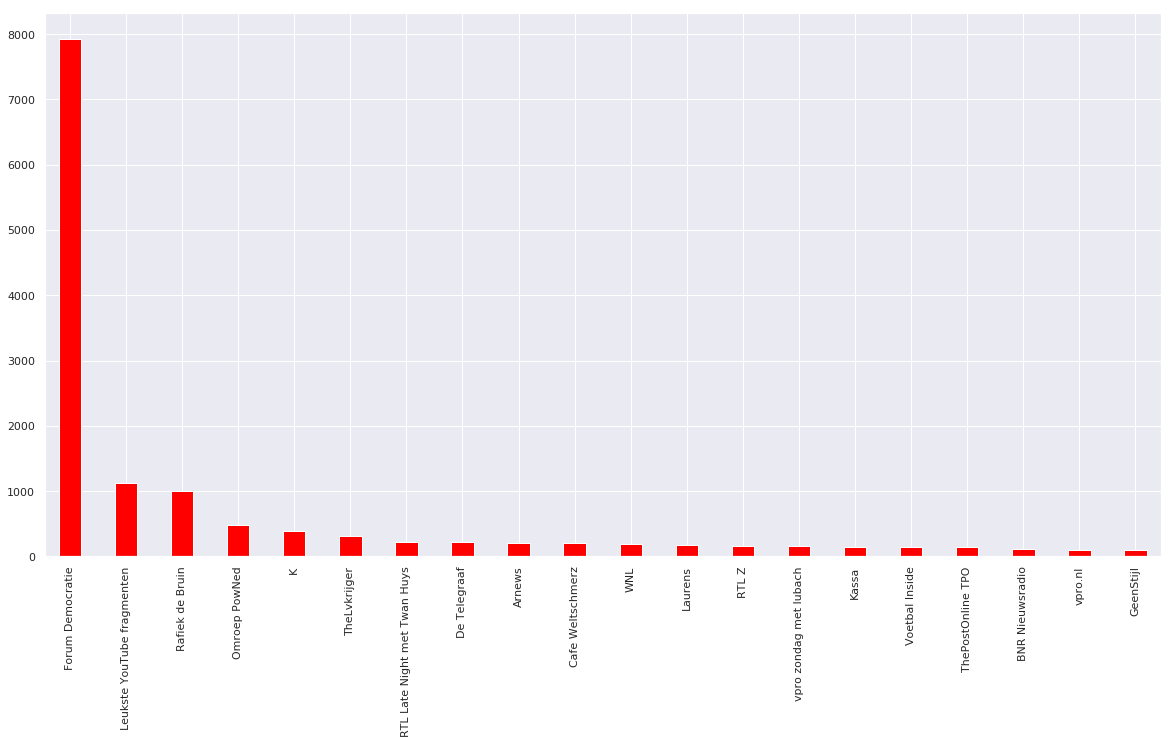

In [253]:
top_channels = filtered_recs.target_channel_title.value_counts()[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

top_channels.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

### See recommendations by topic

We could do the same tric we did before: use the video tags to get a group of videos about a certain topic. Then we can see what channels (and videos) are recommended

In [264]:
# You can pick another video of this list of videps of selected channel.

query_topic = 'sylvana'

# Define the search terms that are likely to produce the best results. You can use regular expressions.

query = ['sylvana', 'bij1', 'simons']

In [265]:
pattern = '|'.join([s for s in query])
mask = recs['source_video_tags'].str.contains(pattern, regex=True, case=False, na=False)
result = recs[mask]

len(result)

1381

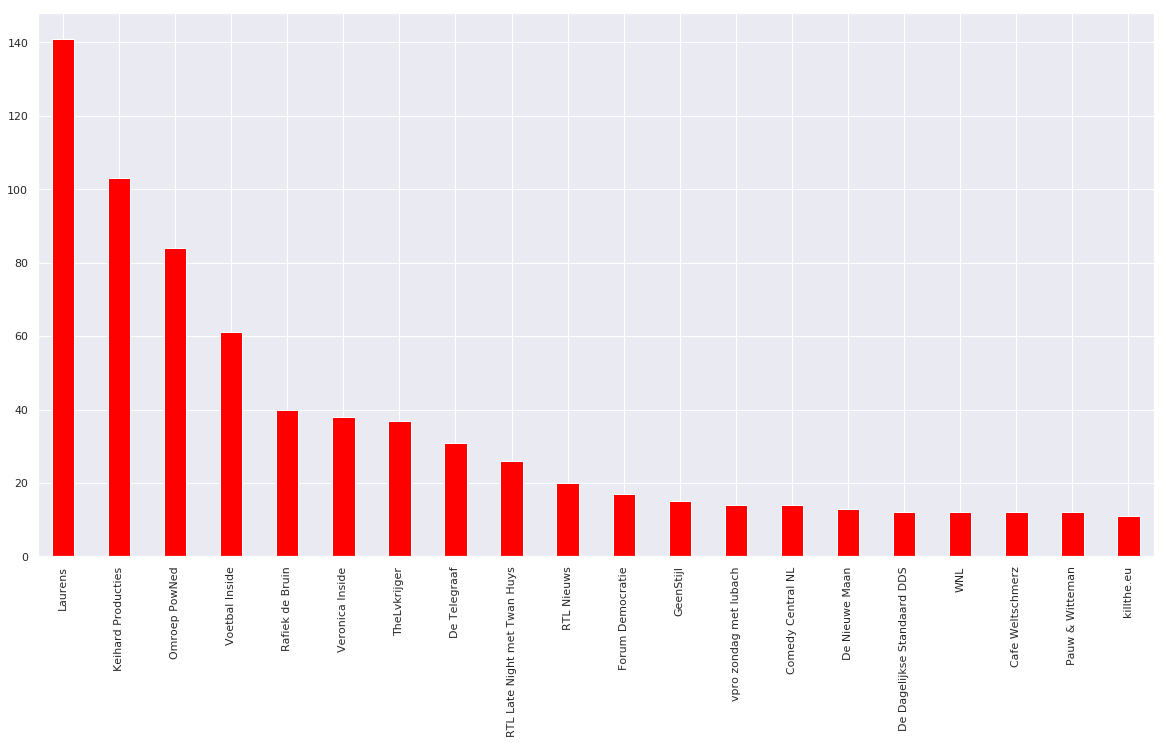

In [269]:
top_channels = result.target_channel_title.value_counts()[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

top_channels.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

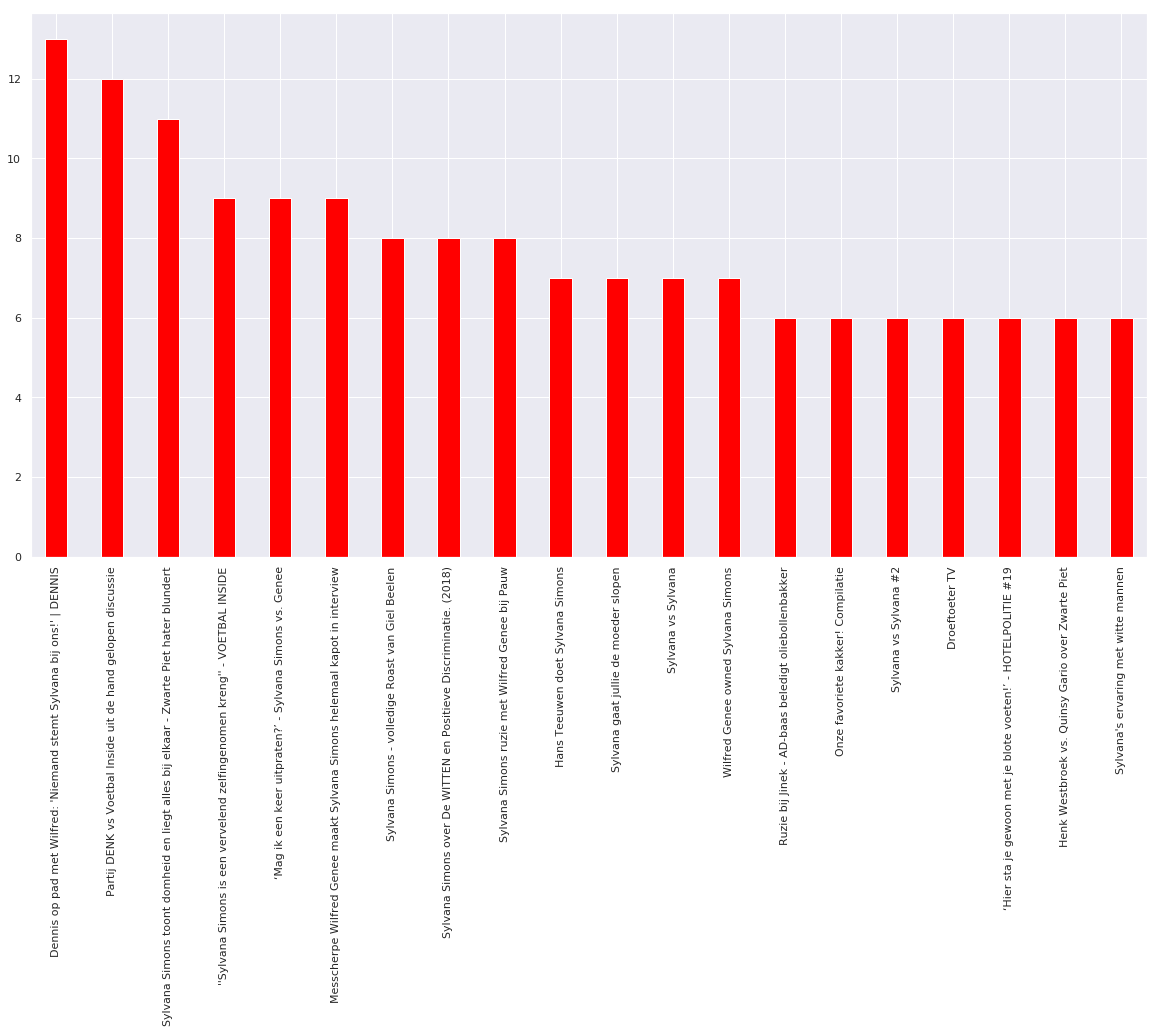

In [271]:
top_videos = result.target_video_title.value_counts()[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

top_videos.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()